##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0-rc1


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [7]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [10]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

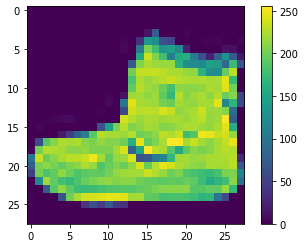

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

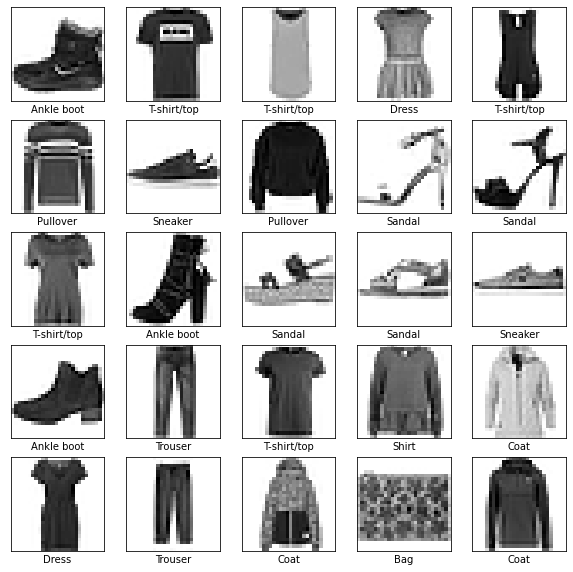

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 22:15 - loss: 2.6437 - accuracy: 0.0312

  27/1875 [..............................] - ETA: 3s - loss: 1.4617 - accuracy: 0.5278   

  54/1875 [..............................] - ETA: 3s - loss: 1.1659 - accuracy: 0.6157

  82/1875 [>.............................] - ETA: 3s - loss: 1.0220 - accuracy: 0.6562

 109/1875 [>.............................] - ETA: 3s - loss: 0.9375 - accuracy: 0.6829

 136/1875 [=>............................] - ETA: 3s - loss: 0.8826 - accuracy: 0.7034

 164/1875 [=>............................] - ETA: 3s - loss: 0.8348 - accuracy: 0.7178

 192/1875 [==>...........................] - ETA: 3s - loss: 0.8004 - accuracy: 0.7279

 220/1875 [==>...........................] - ETA: 3s - loss: 0.7767 - accuracy: 0.7366

 248/1875 [==>...........................] - ETA: 3s - loss: 0.7616 - accuracy: 0.7409

 277/1875 [===>..........................] - ETA: 2s - loss: 0.7477 - accuracy: 0.7451

 305/1875 [===>..........................] - ETA: 2s - loss: 0.7305 - accuracy: 0.7503

 333/1875 [====>.........................] - ETA: 2s - loss: 0.7143 - accuracy: 0.7558

 362/1875 [====>.........................] - ETA: 2s - loss: 0.6967 - accuracy: 0.7615

 389/1875 [=====>........................] - ETA: 2s - loss: 0.6848 - accuracy: 0.7652

 418/1875 [=====>........................] - ETA: 2s - loss: 0.6750 - accuracy: 0.7685

 447/1875 [======>.......................] - ETA: 2s - loss: 0.6647 - accuracy: 0.7717

 474/1875 [======>.......................] - ETA: 2s - loss: 0.6568 - accuracy: 0.7748

 502/1875 [=======>......................] - ETA: 2s - loss: 0.6461 - accuracy: 0.7781

 530/1875 [=======>......................] - ETA: 2s - loss: 0.6394 - accuracy: 0.7805

 558/1875 [=======>......................] - ETA: 2s - loss: 0.6298 - accuracy: 0.7842

 585/1875 [========>.....................] - ETA: 2s - loss: 0.6233 - accuracy: 0.7856

 614/1875 [========>.....................] - ETA: 2s - loss: 0.6177 - accuracy: 0.7874

 642/1875 [=========>....................] - ETA: 2s - loss: 0.6141 - accuracy: 0.7887

 669/1875 [=========>....................] - ETA: 2s - loss: 0.6075 - accuracy: 0.7908

 697/1875 [==========>...................] - ETA: 2s - loss: 0.6007 - accuracy: 0.7927

 726/1875 [==========>...................] - ETA: 2s - loss: 0.5959 - accuracy: 0.7942

 754/1875 [===========>..................] - ETA: 2s - loss: 0.5895 - accuracy: 0.7956

 782/1875 [===========>..................] - ETA: 1s - loss: 0.5865 - accuracy: 0.7968

 810/1875 [===========>..................] - ETA: 1s - loss: 0.5842 - accuracy: 0.7977

 838/1875 [============>.................] - ETA: 1s - loss: 0.5813 - accuracy: 0.7985

 865/1875 [============>.................] - ETA: 1s - loss: 0.5786 - accuracy: 0.7990

 893/1875 [=============>................] - ETA: 1s - loss: 0.5738 - accuracy: 0.8003

 921/1875 [=============>................] - ETA: 1s - loss: 0.5687 - accuracy: 0.8017

 950/1875 [==============>...............] - ETA: 1s - loss: 0.5641 - accuracy: 0.8034

 978/1875 [==============>...............] - ETA: 1s - loss: 0.5615 - accuracy: 0.8044

1006/1875 [===============>..............] - ETA: 1s - loss: 0.5586 - accuracy: 0.8055

1032/1875 [===============>..............] - ETA: 1s - loss: 0.5555 - accuracy: 0.8067

1057/1875 [===============>..............] - ETA: 1s - loss: 0.5535 - accuracy: 0.8074

1084/1875 [================>.............] - ETA: 1s - loss: 0.5505 - accuracy: 0.8086

1111/1875 [================>.............] - ETA: 1s - loss: 0.5479 - accuracy: 0.8095

1138/1875 [=================>............] - ETA: 1s - loss: 0.5463 - accuracy: 0.8101

1167/1875 [=================>............] - ETA: 1s - loss: 0.5439 - accuracy: 0.8106

1193/1875 [==================>...........] - ETA: 1s - loss: 0.5431 - accuracy: 0.8109

1220/1875 [==================>...........] - ETA: 1s - loss: 0.5397 - accuracy: 0.8119

1248/1875 [==================>...........] - ETA: 1s - loss: 0.5379 - accuracy: 0.8122

1276/1875 [===================>..........] - ETA: 1s - loss: 0.5364 - accuracy: 0.8126

1305/1875 [===================>..........] - ETA: 1s - loss: 0.5335 - accuracy: 0.8136

1333/1875 [====================>.........] - ETA: 0s - loss: 0.5315 - accuracy: 0.8144

1362/1875 [====================>.........] - ETA: 0s - loss: 0.5305 - accuracy: 0.8147

1392/1875 [=====================>........] - ETA: 0s - loss: 0.5280 - accuracy: 0.8153

1421/1875 [=====================>........] - ETA: 0s - loss: 0.5259 - accuracy: 0.8158

1449/1875 [======================>.......] - ETA: 0s - loss: 0.5233 - accuracy: 0.8165

1478/1875 [======================>.......] - ETA: 0s - loss: 0.5209 - accuracy: 0.8172

1506/1875 [=======================>......] - ETA: 0s - loss: 0.5192 - accuracy: 0.8177

1534/1875 [=======================>......] - ETA: 0s - loss: 0.5175 - accuracy: 0.8183

1564/1875 [========================>.....] - ETA: 0s - loss: 0.5154 - accuracy: 0.8191

1592/1875 [========================>.....] - ETA: 0s - loss: 0.5139 - accuracy: 0.8195

1620/1875 [========================>.....] - ETA: 0s - loss: 0.5125 - accuracy: 0.8199

1648/1875 [=========================>....] - ETA: 0s - loss: 0.5110 - accuracy: 0.8205

1676/1875 [=========================>....] - ETA: 0s - loss: 0.5102 - accuracy: 0.8208

1704/1875 [==========================>...] - ETA: 0s - loss: 0.5089 - accuracy: 0.8210

1733/1875 [==========================>...] - ETA: 0s - loss: 0.5075 - accuracy: 0.8215

1761/1875 [===========================>..] - ETA: 0s - loss: 0.5059 - accuracy: 0.8222

1789/1875 [===========================>..] - ETA: 0s - loss: 0.5047 - accuracy: 0.8226

1818/1875 [============================>.] - ETA: 0s - loss: 0.5035 - accuracy: 0.8228

1846/1875 [============================>.] - ETA: 0s - loss: 0.5023 - accuracy: 0.8232

1874/1875 [============================>.] - ETA: 0s - loss: 0.5015 - accuracy: 0.8232

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5014 - accuracy: 0.8232


Epoch 2/10


   1/1875 [..............................] - ETA: 4s - loss: 0.3329 - accuracy: 0.8438

  30/1875 [..............................] - ETA: 3s - loss: 0.3967 - accuracy: 0.8594

  58/1875 [..............................] - ETA: 3s - loss: 0.3790 - accuracy: 0.8675

  86/1875 [>.............................] - ETA: 3s - loss: 0.3756 - accuracy: 0.8645

 114/1875 [>.............................] - ETA: 3s - loss: 0.3864 - accuracy: 0.8599

 143/1875 [=>............................] - ETA: 3s - loss: 0.3966 - accuracy: 0.8566

 172/1875 [=>............................] - ETA: 3s - loss: 0.4016 - accuracy: 0.8547

 201/1875 [==>...........................] - ETA: 2s - loss: 0.3957 - accuracy: 0.8574

 229/1875 [==>...........................] - ETA: 2s - loss: 0.3938 - accuracy: 0.8593

 257/1875 [===>..........................] - ETA: 2s - loss: 0.3967 - accuracy: 0.8596

 285/1875 [===>..........................] - ETA: 2s - loss: 0.3976 - accuracy: 0.8602

 313/1875 [====>.........................] - ETA: 2s - loss: 0.3936 - accuracy: 0.8616

 341/1875 [====>.........................] - ETA: 2s - loss: 0.3914 - accuracy: 0.8613

 370/1875 [====>.........................] - ETA: 2s - loss: 0.3912 - accuracy: 0.8606

 398/1875 [=====>........................] - ETA: 2s - loss: 0.3915 - accuracy: 0.8602

 428/1875 [=====>........................] - ETA: 2s - loss: 0.3926 - accuracy: 0.8600

 457/1875 [======>.......................] - ETA: 2s - loss: 0.3948 - accuracy: 0.8595

 485/1875 [======>.......................] - ETA: 2s - loss: 0.3922 - accuracy: 0.8613

 514/1875 [=======>......................] - ETA: 2s - loss: 0.3891 - accuracy: 0.8625

 543/1875 [=======>......................] - ETA: 2s - loss: 0.3906 - accuracy: 0.8617

 572/1875 [========>.....................] - ETA: 2s - loss: 0.3905 - accuracy: 0.8613

 600/1875 [========>.....................] - ETA: 2s - loss: 0.3885 - accuracy: 0.8622

 628/1875 [=========>....................] - ETA: 2s - loss: 0.3876 - accuracy: 0.8625

 657/1875 [=========>....................] - ETA: 2s - loss: 0.3861 - accuracy: 0.8631

 686/1875 [=========>....................] - ETA: 2s - loss: 0.3870 - accuracy: 0.8627

 716/1875 [==========>...................] - ETA: 2s - loss: 0.3897 - accuracy: 0.8616

 746/1875 [==========>...................] - ETA: 2s - loss: 0.3883 - accuracy: 0.8618

 774/1875 [===========>..................] - ETA: 1s - loss: 0.3858 - accuracy: 0.8624

 802/1875 [===========>..................] - ETA: 1s - loss: 0.3848 - accuracy: 0.8626

 831/1875 [============>.................] - ETA: 1s - loss: 0.3826 - accuracy: 0.8631

 861/1875 [============>.................] - ETA: 1s - loss: 0.3818 - accuracy: 0.8635

 890/1875 [=============>................] - ETA: 1s - loss: 0.3834 - accuracy: 0.8629

 917/1875 [=============>................] - ETA: 1s - loss: 0.3829 - accuracy: 0.8626

 945/1875 [==============>...............] - ETA: 1s - loss: 0.3833 - accuracy: 0.8623

 974/1875 [==============>...............] - ETA: 1s - loss: 0.3833 - accuracy: 0.8628

1003/1875 [===============>..............] - ETA: 1s - loss: 0.3836 - accuracy: 0.8625

1032/1875 [===============>..............] - ETA: 1s - loss: 0.3830 - accuracy: 0.8626

1061/1875 [===============>..............] - ETA: 1s - loss: 0.3825 - accuracy: 0.8628

1089/1875 [================>.............] - ETA: 1s - loss: 0.3811 - accuracy: 0.8632

1117/1875 [================>.............] - ETA: 1s - loss: 0.3822 - accuracy: 0.8624

1145/1875 [=================>............] - ETA: 1s - loss: 0.3820 - accuracy: 0.8622

1174/1875 [=================>............] - ETA: 1s - loss: 0.3808 - accuracy: 0.8626

1202/1875 [==================>...........] - ETA: 1s - loss: 0.3807 - accuracy: 0.8625

1231/1875 [==================>...........] - ETA: 1s - loss: 0.3808 - accuracy: 0.8625

1260/1875 [===================>..........] - ETA: 1s - loss: 0.3810 - accuracy: 0.8626

1288/1875 [===================>..........] - ETA: 1s - loss: 0.3807 - accuracy: 0.8625

1316/1875 [====================>.........] - ETA: 0s - loss: 0.3803 - accuracy: 0.8626

1345/1875 [====================>.........] - ETA: 0s - loss: 0.3791 - accuracy: 0.8631

1374/1875 [====================>.........] - ETA: 0s - loss: 0.3801 - accuracy: 0.8627

1403/1875 [=====================>........] - ETA: 0s - loss: 0.3806 - accuracy: 0.8624

1432/1875 [=====================>........] - ETA: 0s - loss: 0.3809 - accuracy: 0.8623

1460/1875 [======================>.......] - ETA: 0s - loss: 0.3805 - accuracy: 0.8625

1488/1875 [======================>.......] - ETA: 0s - loss: 0.3797 - accuracy: 0.8627

1516/1875 [=======================>......] - ETA: 0s - loss: 0.3799 - accuracy: 0.8625

1545/1875 [=======================>......] - ETA: 0s - loss: 0.3797 - accuracy: 0.8626

1573/1875 [========================>.....] - ETA: 0s - loss: 0.3790 - accuracy: 0.8628

1601/1875 [========================>.....] - ETA: 0s - loss: 0.3793 - accuracy: 0.8629

1630/1875 [=========================>....] - ETA: 0s - loss: 0.3782 - accuracy: 0.8634

1659/1875 [=========================>....] - ETA: 0s - loss: 0.3788 - accuracy: 0.8631

1688/1875 [==========================>...] - ETA: 0s - loss: 0.3785 - accuracy: 0.8631

1716/1875 [==========================>...] - ETA: 0s - loss: 0.3786 - accuracy: 0.8633

1746/1875 [==========================>...] - ETA: 0s - loss: 0.3793 - accuracy: 0.8630

1774/1875 [===========================>..] - ETA: 0s - loss: 0.3795 - accuracy: 0.8628

1803/1875 [===========================>..] - ETA: 0s - loss: 0.3790 - accuracy: 0.8630

1832/1875 [============================>.] - ETA: 0s - loss: 0.3780 - accuracy: 0.8634

1862/1875 [============================>.] - ETA: 0s - loss: 0.3774 - accuracy: 0.8635

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3770 - accuracy: 0.8636


Epoch 3/10


   1/1875 [..............................] - ETA: 4s - loss: 0.3386 - accuracy: 0.9062

  30/1875 [..............................] - ETA: 3s - loss: 0.3019 - accuracy: 0.8885

  59/1875 [..............................] - ETA: 3s - loss: 0.3119 - accuracy: 0.8867

  88/1875 [>.............................] - ETA: 3s - loss: 0.3270 - accuracy: 0.8871

 117/1875 [>.............................] - ETA: 3s - loss: 0.3335 - accuracy: 0.8817

 145/1875 [=>............................] - ETA: 3s - loss: 0.3359 - accuracy: 0.8787

 173/1875 [=>............................] - ETA: 3s - loss: 0.3371 - accuracy: 0.8773

 201/1875 [==>...........................] - ETA: 2s - loss: 0.3416 - accuracy: 0.8748

 230/1875 [==>...........................] - ETA: 2s - loss: 0.3468 - accuracy: 0.8726

 259/1875 [===>..........................] - ETA: 2s - loss: 0.3458 - accuracy: 0.8722

 285/1875 [===>..........................] - ETA: 2s - loss: 0.3415 - accuracy: 0.8743

 312/1875 [===>..........................] - ETA: 2s - loss: 0.3401 - accuracy: 0.8755

 339/1875 [====>.........................] - ETA: 2s - loss: 0.3398 - accuracy: 0.8762

 366/1875 [====>.........................] - ETA: 2s - loss: 0.3377 - accuracy: 0.8764

 394/1875 [=====>........................] - ETA: 2s - loss: 0.3414 - accuracy: 0.8743

 422/1875 [=====>........................] - ETA: 2s - loss: 0.3388 - accuracy: 0.8759

 451/1875 [======>.......................] - ETA: 2s - loss: 0.3373 - accuracy: 0.8771

 480/1875 [======>.......................] - ETA: 2s - loss: 0.3353 - accuracy: 0.8781

 509/1875 [=======>......................] - ETA: 2s - loss: 0.3381 - accuracy: 0.8766

 537/1875 [=======>......................] - ETA: 2s - loss: 0.3371 - accuracy: 0.8775

 566/1875 [========>.....................] - ETA: 2s - loss: 0.3351 - accuracy: 0.8778

 595/1875 [========>.....................] - ETA: 2s - loss: 0.3346 - accuracy: 0.8774

 623/1875 [========>.....................] - ETA: 2s - loss: 0.3341 - accuracy: 0.8778

 652/1875 [=========>....................] - ETA: 2s - loss: 0.3358 - accuracy: 0.8773

 680/1875 [=========>....................] - ETA: 2s - loss: 0.3394 - accuracy: 0.8760

 709/1875 [==========>...................] - ETA: 2s - loss: 0.3412 - accuracy: 0.8748

 737/1875 [==========>...................] - ETA: 2s - loss: 0.3425 - accuracy: 0.8744

 766/1875 [===========>..................] - ETA: 1s - loss: 0.3435 - accuracy: 0.8743

 795/1875 [===========>..................] - ETA: 1s - loss: 0.3440 - accuracy: 0.8743

 824/1875 [============>.................] - ETA: 1s - loss: 0.3443 - accuracy: 0.8739

 852/1875 [============>.................] - ETA: 1s - loss: 0.3445 - accuracy: 0.8736

 881/1875 [=============>................] - ETA: 1s - loss: 0.3454 - accuracy: 0.8732

 909/1875 [=============>................] - ETA: 1s - loss: 0.3446 - accuracy: 0.8735

 938/1875 [==============>...............] - ETA: 1s - loss: 0.3441 - accuracy: 0.8739

 966/1875 [==============>...............] - ETA: 1s - loss: 0.3436 - accuracy: 0.8742

 995/1875 [==============>...............] - ETA: 1s - loss: 0.3441 - accuracy: 0.8736

1023/1875 [===============>..............] - ETA: 1s - loss: 0.3438 - accuracy: 0.8738

1052/1875 [===============>..............] - ETA: 1s - loss: 0.3439 - accuracy: 0.8737

1081/1875 [================>.............] - ETA: 1s - loss: 0.3452 - accuracy: 0.8731

1110/1875 [================>.............] - ETA: 1s - loss: 0.3436 - accuracy: 0.8738

1139/1875 [=================>............] - ETA: 1s - loss: 0.3428 - accuracy: 0.8738

1168/1875 [=================>............] - ETA: 1s - loss: 0.3418 - accuracy: 0.8743

1197/1875 [==================>...........] - ETA: 1s - loss: 0.3413 - accuracy: 0.8742

1225/1875 [==================>...........] - ETA: 1s - loss: 0.3417 - accuracy: 0.8740

1254/1875 [===================>..........] - ETA: 1s - loss: 0.3417 - accuracy: 0.8743

1282/1875 [===================>..........] - ETA: 1s - loss: 0.3411 - accuracy: 0.8745

1311/1875 [===================>..........] - ETA: 1s - loss: 0.3401 - accuracy: 0.8749

1340/1875 [====================>.........] - ETA: 0s - loss: 0.3393 - accuracy: 0.8750

1369/1875 [====================>.........] - ETA: 0s - loss: 0.3405 - accuracy: 0.8746

1398/1875 [=====================>........] - ETA: 0s - loss: 0.3403 - accuracy: 0.8747

1427/1875 [=====================>........] - ETA: 0s - loss: 0.3401 - accuracy: 0.8752

1456/1875 [======================>.......] - ETA: 0s - loss: 0.3395 - accuracy: 0.8754

1485/1875 [======================>.......] - ETA: 0s - loss: 0.3401 - accuracy: 0.8753

1513/1875 [=======================>......] - ETA: 0s - loss: 0.3403 - accuracy: 0.8755

1541/1875 [=======================>......] - ETA: 0s - loss: 0.3391 - accuracy: 0.8758

1570/1875 [========================>.....] - ETA: 0s - loss: 0.3391 - accuracy: 0.8761

1599/1875 [========================>.....] - ETA: 0s - loss: 0.3388 - accuracy: 0.8762

1628/1875 [=========================>....] - ETA: 0s - loss: 0.3384 - accuracy: 0.8763

1657/1875 [=========================>....] - ETA: 0s - loss: 0.3383 - accuracy: 0.8764

1686/1875 [=========================>....] - ETA: 0s - loss: 0.3376 - accuracy: 0.8767

1714/1875 [==========================>...] - ETA: 0s - loss: 0.3379 - accuracy: 0.8767

1743/1875 [==========================>...] - ETA: 0s - loss: 0.3378 - accuracy: 0.8768

1771/1875 [===========================>..] - ETA: 0s - loss: 0.3382 - accuracy: 0.8768

1801/1875 [===========================>..] - ETA: 0s - loss: 0.3377 - accuracy: 0.8768

1829/1875 [============================>.] - ETA: 0s - loss: 0.3374 - accuracy: 0.8770

1857/1875 [============================>.] - ETA: 0s - loss: 0.3377 - accuracy: 0.8769

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3376 - accuracy: 0.8770


Epoch 4/10


   1/1875 [..............................] - ETA: 4s - loss: 0.5874 - accuracy: 0.7812

  30/1875 [..............................] - ETA: 3s - loss: 0.3556 - accuracy: 0.8719

  59/1875 [..............................] - ETA: 3s - loss: 0.3245 - accuracy: 0.8829

  86/1875 [>.............................] - ETA: 3s - loss: 0.3379 - accuracy: 0.8765

 113/1875 [>.............................] - ETA: 3s - loss: 0.3331 - accuracy: 0.8786

 142/1875 [=>............................] - ETA: 3s - loss: 0.3236 - accuracy: 0.8820

 171/1875 [=>............................] - ETA: 3s - loss: 0.3279 - accuracy: 0.8816

 198/1875 [==>...........................] - ETA: 3s - loss: 0.3238 - accuracy: 0.8830

 226/1875 [==>...........................] - ETA: 2s - loss: 0.3228 - accuracy: 0.8815

 253/1875 [===>..........................] - ETA: 2s - loss: 0.3215 - accuracy: 0.8817

 280/1875 [===>..........................] - ETA: 2s - loss: 0.3198 - accuracy: 0.8830

 308/1875 [===>..........................] - ETA: 2s - loss: 0.3158 - accuracy: 0.8835

 337/1875 [====>.........................] - ETA: 2s - loss: 0.3184 - accuracy: 0.8831

 366/1875 [====>.........................] - ETA: 2s - loss: 0.3184 - accuracy: 0.8838

 395/1875 [=====>........................] - ETA: 2s - loss: 0.3140 - accuracy: 0.8852

 425/1875 [=====>........................] - ETA: 2s - loss: 0.3170 - accuracy: 0.8843

 453/1875 [======>.......................] - ETA: 2s - loss: 0.3162 - accuracy: 0.8847

 482/1875 [======>.......................] - ETA: 2s - loss: 0.3152 - accuracy: 0.8848

 511/1875 [=======>......................] - ETA: 2s - loss: 0.3160 - accuracy: 0.8849

 540/1875 [=======>......................] - ETA: 2s - loss: 0.3157 - accuracy: 0.8856

 569/1875 [========>.....................] - ETA: 2s - loss: 0.3154 - accuracy: 0.8858

 598/1875 [========>.....................] - ETA: 2s - loss: 0.3172 - accuracy: 0.8854

 628/1875 [=========>....................] - ETA: 2s - loss: 0.3168 - accuracy: 0.8856

 658/1875 [=========>....................] - ETA: 2s - loss: 0.3179 - accuracy: 0.8854

 687/1875 [=========>....................] - ETA: 2s - loss: 0.3176 - accuracy: 0.8851

 716/1875 [==========>...................] - ETA: 2s - loss: 0.3171 - accuracy: 0.8847

 745/1875 [==========>...................] - ETA: 2s - loss: 0.3178 - accuracy: 0.8841

 773/1875 [===========>..................] - ETA: 1s - loss: 0.3172 - accuracy: 0.8842

 802/1875 [===========>..................] - ETA: 1s - loss: 0.3174 - accuracy: 0.8841

 831/1875 [============>.................] - ETA: 1s - loss: 0.3177 - accuracy: 0.8844

 859/1875 [============>.................] - ETA: 1s - loss: 0.3158 - accuracy: 0.8850

 888/1875 [=============>................] - ETA: 1s - loss: 0.3149 - accuracy: 0.8852

 917/1875 [=============>................] - ETA: 1s - loss: 0.3147 - accuracy: 0.8855

 947/1875 [==============>...............] - ETA: 1s - loss: 0.3140 - accuracy: 0.8854

 977/1875 [==============>...............] - ETA: 1s - loss: 0.3130 - accuracy: 0.8854

1006/1875 [===============>..............] - ETA: 1s - loss: 0.3135 - accuracy: 0.8854

1036/1875 [===============>..............] - ETA: 1s - loss: 0.3153 - accuracy: 0.8844

1065/1875 [================>.............] - ETA: 1s - loss: 0.3156 - accuracy: 0.8840

1094/1875 [================>.............] - ETA: 1s - loss: 0.3155 - accuracy: 0.8841

1123/1875 [================>.............] - ETA: 1s - loss: 0.3163 - accuracy: 0.8838

1152/1875 [=================>............] - ETA: 1s - loss: 0.3163 - accuracy: 0.8836

1181/1875 [=================>............] - ETA: 1s - loss: 0.3158 - accuracy: 0.8838

1209/1875 [==================>...........] - ETA: 1s - loss: 0.3170 - accuracy: 0.8834

1238/1875 [==================>...........] - ETA: 1s - loss: 0.3179 - accuracy: 0.8831

1267/1875 [===================>..........] - ETA: 1s - loss: 0.3177 - accuracy: 0.8831

1296/1875 [===================>..........] - ETA: 1s - loss: 0.3177 - accuracy: 0.8832

1323/1875 [====================>.........] - ETA: 0s - loss: 0.3179 - accuracy: 0.8833

1351/1875 [====================>.........] - ETA: 0s - loss: 0.3175 - accuracy: 0.8834

1378/1875 [=====================>........] - ETA: 0s - loss: 0.3173 - accuracy: 0.8832

1406/1875 [=====================>........] - ETA: 0s - loss: 0.3171 - accuracy: 0.8832

1432/1875 [=====================>........] - ETA: 0s - loss: 0.3174 - accuracy: 0.8829

1459/1875 [======================>.......] - ETA: 0s - loss: 0.3162 - accuracy: 0.8834

1485/1875 [======================>.......] - ETA: 0s - loss: 0.3161 - accuracy: 0.8837

1511/1875 [=======================>......] - ETA: 0s - loss: 0.3157 - accuracy: 0.8837

1537/1875 [=======================>......] - ETA: 0s - loss: 0.3155 - accuracy: 0.8837

1564/1875 [========================>.....] - ETA: 0s - loss: 0.3154 - accuracy: 0.8839

1592/1875 [========================>.....] - ETA: 0s - loss: 0.3159 - accuracy: 0.8838

1620/1875 [========================>.....] - ETA: 0s - loss: 0.3163 - accuracy: 0.8836

1649/1875 [=========================>....] - ETA: 0s - loss: 0.3158 - accuracy: 0.8838

1678/1875 [=========================>....] - ETA: 0s - loss: 0.3152 - accuracy: 0.8840

1706/1875 [==========================>...] - ETA: 0s - loss: 0.3160 - accuracy: 0.8837

1734/1875 [==========================>...] - ETA: 0s - loss: 0.3153 - accuracy: 0.8840

1762/1875 [===========================>..] - ETA: 0s - loss: 0.3153 - accuracy: 0.8841

1791/1875 [===========================>..] - ETA: 0s - loss: 0.3153 - accuracy: 0.8841

1821/1875 [============================>.] - ETA: 0s - loss: 0.3154 - accuracy: 0.8838

1850/1875 [============================>.] - ETA: 0s - loss: 0.3151 - accuracy: 0.8840

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3148 - accuracy: 0.8841


Epoch 5/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1516 - accuracy: 0.9375

  29/1875 [..............................] - ETA: 3s - loss: 0.2703 - accuracy: 0.8987

  58/1875 [..............................] - ETA: 3s - loss: 0.2768 - accuracy: 0.9025

  86/1875 [>.............................] - ETA: 3s - loss: 0.3066 - accuracy: 0.8924

 113/1875 [>.............................] - ETA: 3s - loss: 0.3025 - accuracy: 0.8916

 142/1875 [=>............................] - ETA: 3s - loss: 0.2992 - accuracy: 0.8922

 170/1875 [=>............................] - ETA: 3s - loss: 0.2976 - accuracy: 0.8917

 198/1875 [==>...........................] - ETA: 3s - loss: 0.3024 - accuracy: 0.8903

 227/1875 [==>...........................] - ETA: 2s - loss: 0.3056 - accuracy: 0.8888

 256/1875 [===>..........................] - ETA: 2s - loss: 0.3036 - accuracy: 0.8888

 285/1875 [===>..........................] - ETA: 2s - loss: 0.3027 - accuracy: 0.8891

 314/1875 [====>.........................] - ETA: 2s - loss: 0.3016 - accuracy: 0.8895

 342/1875 [====>.........................] - ETA: 2s - loss: 0.3032 - accuracy: 0.8888

 371/1875 [====>.........................] - ETA: 2s - loss: 0.3019 - accuracy: 0.8890

 399/1875 [=====>........................] - ETA: 2s - loss: 0.3012 - accuracy: 0.8896

 426/1875 [=====>........................] - ETA: 2s - loss: 0.3028 - accuracy: 0.8891

 455/1875 [======>.......................] - ETA: 2s - loss: 0.3002 - accuracy: 0.8900

 484/1875 [======>.......................] - ETA: 2s - loss: 0.3010 - accuracy: 0.8893

 512/1875 [=======>......................] - ETA: 2s - loss: 0.3009 - accuracy: 0.8889

 541/1875 [=======>......................] - ETA: 2s - loss: 0.3010 - accuracy: 0.8888

 570/1875 [========>.....................] - ETA: 2s - loss: 0.3006 - accuracy: 0.8891

 599/1875 [========>.....................] - ETA: 2s - loss: 0.3008 - accuracy: 0.8893

 627/1875 [=========>....................] - ETA: 2s - loss: 0.3016 - accuracy: 0.8894

 655/1875 [=========>....................] - ETA: 2s - loss: 0.3032 - accuracy: 0.8889

 683/1875 [=========>....................] - ETA: 2s - loss: 0.3028 - accuracy: 0.8892

 712/1875 [==========>...................] - ETA: 2s - loss: 0.3020 - accuracy: 0.8897

 741/1875 [==========>...................] - ETA: 2s - loss: 0.3023 - accuracy: 0.8894

 769/1875 [===========>..................] - ETA: 1s - loss: 0.3023 - accuracy: 0.8890

 798/1875 [===========>..................] - ETA: 1s - loss: 0.3003 - accuracy: 0.8898

 827/1875 [============>.................] - ETA: 1s - loss: 0.3005 - accuracy: 0.8897

 855/1875 [============>.................] - ETA: 1s - loss: 0.3022 - accuracy: 0.8890

 883/1875 [=============>................] - ETA: 1s - loss: 0.3024 - accuracy: 0.8889

 912/1875 [=============>................] - ETA: 1s - loss: 0.2999 - accuracy: 0.8898

 941/1875 [==============>...............] - ETA: 1s - loss: 0.2994 - accuracy: 0.8899

 969/1875 [==============>...............] - ETA: 1s - loss: 0.2988 - accuracy: 0.8900

 996/1875 [==============>...............] - ETA: 1s - loss: 0.2984 - accuracy: 0.8902

1024/1875 [===============>..............] - ETA: 1s - loss: 0.2989 - accuracy: 0.8900

1053/1875 [===============>..............] - ETA: 1s - loss: 0.2997 - accuracy: 0.8896

1082/1875 [================>.............] - ETA: 1s - loss: 0.2999 - accuracy: 0.8896

1111/1875 [================>.............] - ETA: 1s - loss: 0.2992 - accuracy: 0.8897

1140/1875 [=================>............] - ETA: 1s - loss: 0.2988 - accuracy: 0.8897

1168/1875 [=================>............] - ETA: 1s - loss: 0.2991 - accuracy: 0.8898

1195/1875 [==================>...........] - ETA: 1s - loss: 0.2994 - accuracy: 0.8896

1222/1875 [==================>...........] - ETA: 1s - loss: 0.2994 - accuracy: 0.8896

1249/1875 [==================>...........] - ETA: 1s - loss: 0.2994 - accuracy: 0.8896

1277/1875 [===================>..........] - ETA: 1s - loss: 0.2989 - accuracy: 0.8896

1305/1875 [===================>..........] - ETA: 1s - loss: 0.2983 - accuracy: 0.8897

1332/1875 [====================>.........] - ETA: 0s - loss: 0.2975 - accuracy: 0.8899

1359/1875 [====================>.........] - ETA: 0s - loss: 0.2978 - accuracy: 0.8898

1387/1875 [=====================>........] - ETA: 0s - loss: 0.2977 - accuracy: 0.8897

1413/1875 [=====================>........] - ETA: 0s - loss: 0.2972 - accuracy: 0.8898

1441/1875 [======================>.......] - ETA: 0s - loss: 0.2975 - accuracy: 0.8899

1470/1875 [======================>.......] - ETA: 0s - loss: 0.2974 - accuracy: 0.8899

1499/1875 [======================>.......] - ETA: 0s - loss: 0.2968 - accuracy: 0.8899

1526/1875 [=======================>......] - ETA: 0s - loss: 0.2969 - accuracy: 0.8897

1553/1875 [=======================>......] - ETA: 0s - loss: 0.2975 - accuracy: 0.8895

1579/1875 [========================>.....] - ETA: 0s - loss: 0.2978 - accuracy: 0.8894

1605/1875 [========================>.....] - ETA: 0s - loss: 0.2972 - accuracy: 0.8898

1631/1875 [=========================>....] - ETA: 0s - loss: 0.2971 - accuracy: 0.8898

1658/1875 [=========================>....] - ETA: 0s - loss: 0.2977 - accuracy: 0.8897

1687/1875 [=========================>....] - ETA: 0s - loss: 0.2975 - accuracy: 0.8900

1716/1875 [==========================>...] - ETA: 0s - loss: 0.2973 - accuracy: 0.8900

1745/1875 [==========================>...] - ETA: 0s - loss: 0.2972 - accuracy: 0.8899

1774/1875 [===========================>..] - ETA: 0s - loss: 0.2975 - accuracy: 0.8897

1803/1875 [===========================>..] - ETA: 0s - loss: 0.2969 - accuracy: 0.8899

1832/1875 [============================>.] - ETA: 0s - loss: 0.2974 - accuracy: 0.8899

1861/1875 [============================>.] - ETA: 0s - loss: 0.2973 - accuracy: 0.8899

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2973 - accuracy: 0.8899


Epoch 6/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2411 - accuracy: 0.8750

  30/1875 [..............................] - ETA: 3s - loss: 0.2824 - accuracy: 0.9042

  59/1875 [..............................] - ETA: 3s - loss: 0.2862 - accuracy: 0.8925

  86/1875 [>.............................] - ETA: 3s - loss: 0.2901 - accuracy: 0.8917

 113/1875 [>.............................] - ETA: 3s - loss: 0.2850 - accuracy: 0.8955

 142/1875 [=>............................] - ETA: 3s - loss: 0.2890 - accuracy: 0.8946

 170/1875 [=>............................] - ETA: 3s - loss: 0.2836 - accuracy: 0.8972

 198/1875 [==>...........................] - ETA: 3s - loss: 0.2819 - accuracy: 0.8984

 227/1875 [==>...........................] - ETA: 2s - loss: 0.2830 - accuracy: 0.8980

 256/1875 [===>..........................] - ETA: 2s - loss: 0.2856 - accuracy: 0.8958

 285/1875 [===>..........................] - ETA: 2s - loss: 0.2846 - accuracy: 0.8963

 313/1875 [====>.........................] - ETA: 2s - loss: 0.2839 - accuracy: 0.8964

 342/1875 [====>.........................] - ETA: 2s - loss: 0.2834 - accuracy: 0.8954

 371/1875 [====>.........................] - ETA: 2s - loss: 0.2829 - accuracy: 0.8959

 400/1875 [=====>........................] - ETA: 2s - loss: 0.2797 - accuracy: 0.8966

 429/1875 [=====>........................] - ETA: 2s - loss: 0.2784 - accuracy: 0.8975

 458/1875 [======>.......................] - ETA: 2s - loss: 0.2786 - accuracy: 0.8966

 487/1875 [======>.......................] - ETA: 2s - loss: 0.2791 - accuracy: 0.8959

 516/1875 [=======>......................] - ETA: 2s - loss: 0.2794 - accuracy: 0.8960

 545/1875 [=======>......................] - ETA: 2s - loss: 0.2795 - accuracy: 0.8962

 574/1875 [========>.....................] - ETA: 2s - loss: 0.2786 - accuracy: 0.8964

 602/1875 [========>.....................] - ETA: 2s - loss: 0.2774 - accuracy: 0.8961

 632/1875 [=========>....................] - ETA: 2s - loss: 0.2766 - accuracy: 0.8967

 659/1875 [=========>....................] - ETA: 2s - loss: 0.2764 - accuracy: 0.8960

 686/1875 [=========>....................] - ETA: 2s - loss: 0.2764 - accuracy: 0.8960

 715/1875 [==========>...................] - ETA: 2s - loss: 0.2768 - accuracy: 0.8958

 744/1875 [==========>...................] - ETA: 2s - loss: 0.2772 - accuracy: 0.8958

 772/1875 [===========>..................] - ETA: 1s - loss: 0.2769 - accuracy: 0.8956

 801/1875 [===========>..................] - ETA: 1s - loss: 0.2767 - accuracy: 0.8959

 830/1875 [============>.................] - ETA: 1s - loss: 0.2777 - accuracy: 0.8954

 858/1875 [============>.................] - ETA: 1s - loss: 0.2772 - accuracy: 0.8956

 887/1875 [=============>................] - ETA: 1s - loss: 0.2771 - accuracy: 0.8958

 915/1875 [=============>................] - ETA: 1s - loss: 0.2790 - accuracy: 0.8952

 944/1875 [==============>...............] - ETA: 1s - loss: 0.2798 - accuracy: 0.8948

 972/1875 [==============>...............] - ETA: 1s - loss: 0.2800 - accuracy: 0.8950

1001/1875 [===============>..............] - ETA: 1s - loss: 0.2809 - accuracy: 0.8949

1029/1875 [===============>..............] - ETA: 1s - loss: 0.2812 - accuracy: 0.8948

1058/1875 [===============>..............] - ETA: 1s - loss: 0.2805 - accuracy: 0.8951

1088/1875 [================>.............] - ETA: 1s - loss: 0.2800 - accuracy: 0.8954

1116/1875 [================>.............] - ETA: 1s - loss: 0.2803 - accuracy: 0.8957

1145/1875 [=================>............] - ETA: 1s - loss: 0.2807 - accuracy: 0.8955

1174/1875 [=================>............] - ETA: 1s - loss: 0.2810 - accuracy: 0.8949

1203/1875 [==================>...........] - ETA: 1s - loss: 0.2812 - accuracy: 0.8952

1231/1875 [==================>...........] - ETA: 1s - loss: 0.2811 - accuracy: 0.8954

1260/1875 [===================>..........] - ETA: 1s - loss: 0.2820 - accuracy: 0.8952

1288/1875 [===================>..........] - ETA: 1s - loss: 0.2819 - accuracy: 0.8949

1315/1875 [====================>.........] - ETA: 0s - loss: 0.2820 - accuracy: 0.8949

1343/1875 [====================>.........] - ETA: 0s - loss: 0.2807 - accuracy: 0.8955

1372/1875 [====================>.........] - ETA: 0s - loss: 0.2807 - accuracy: 0.8953

1399/1875 [=====================>........] - ETA: 0s - loss: 0.2804 - accuracy: 0.8954

1424/1875 [=====================>........] - ETA: 0s - loss: 0.2803 - accuracy: 0.8956

1450/1875 [======================>.......] - ETA: 0s - loss: 0.2805 - accuracy: 0.8955

1478/1875 [======================>.......] - ETA: 0s - loss: 0.2804 - accuracy: 0.8957

1506/1875 [=======================>......] - ETA: 0s - loss: 0.2807 - accuracy: 0.8958

1535/1875 [=======================>......] - ETA: 0s - loss: 0.2800 - accuracy: 0.8961

1564/1875 [========================>.....] - ETA: 0s - loss: 0.2808 - accuracy: 0.8958

1592/1875 [========================>.....] - ETA: 0s - loss: 0.2810 - accuracy: 0.8957

1621/1875 [========================>.....] - ETA: 0s - loss: 0.2816 - accuracy: 0.8955

1651/1875 [=========================>....] - ETA: 0s - loss: 0.2817 - accuracy: 0.8953

1679/1875 [=========================>....] - ETA: 0s - loss: 0.2810 - accuracy: 0.8956

1707/1875 [==========================>...] - ETA: 0s - loss: 0.2807 - accuracy: 0.8957

1735/1875 [==========================>...] - ETA: 0s - loss: 0.2810 - accuracy: 0.8956

1763/1875 [===========================>..] - ETA: 0s - loss: 0.2809 - accuracy: 0.8955

1790/1875 [===========================>..] - ETA: 0s - loss: 0.2805 - accuracy: 0.8956

1818/1875 [============================>.] - ETA: 0s - loss: 0.2809 - accuracy: 0.8956

1846/1875 [============================>.] - ETA: 0s - loss: 0.2810 - accuracy: 0.8956

1874/1875 [============================>.] - ETA: 0s - loss: 0.2806 - accuracy: 0.8956

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2807 - accuracy: 0.8955


Epoch 7/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1955 - accuracy: 0.9375

  30/1875 [..............................] - ETA: 3s - loss: 0.2424 - accuracy: 0.9073

  59/1875 [..............................] - ETA: 3s - loss: 0.2613 - accuracy: 0.8972

  87/1875 [>.............................] - ETA: 3s - loss: 0.2551 - accuracy: 0.9001

 114/1875 [>.............................] - ETA: 3s - loss: 0.2616 - accuracy: 0.8978

 142/1875 [=>............................] - ETA: 3s - loss: 0.2585 - accuracy: 0.9012

 170/1875 [=>............................] - ETA: 3s - loss: 0.2598 - accuracy: 0.9009

 197/1875 [==>...........................] - ETA: 3s - loss: 0.2551 - accuracy: 0.9045

 225/1875 [==>...........................] - ETA: 2s - loss: 0.2554 - accuracy: 0.9047

 253/1875 [===>..........................] - ETA: 2s - loss: 0.2561 - accuracy: 0.9044

 282/1875 [===>..........................] - ETA: 2s - loss: 0.2579 - accuracy: 0.9040

 310/1875 [===>..........................] - ETA: 2s - loss: 0.2596 - accuracy: 0.9035

 338/1875 [====>.........................] - ETA: 2s - loss: 0.2585 - accuracy: 0.9044

 366/1875 [====>.........................] - ETA: 2s - loss: 0.2601 - accuracy: 0.9034

 393/1875 [=====>........................] - ETA: 2s - loss: 0.2632 - accuracy: 0.9020

 421/1875 [=====>........................] - ETA: 2s - loss: 0.2646 - accuracy: 0.9022

 449/1875 [======>.......................] - ETA: 2s - loss: 0.2638 - accuracy: 0.9023

 478/1875 [======>.......................] - ETA: 2s - loss: 0.2656 - accuracy: 0.9019

 506/1875 [=======>......................] - ETA: 2s - loss: 0.2636 - accuracy: 0.9022

 534/1875 [=======>......................] - ETA: 2s - loss: 0.2642 - accuracy: 0.9009

 561/1875 [=======>......................] - ETA: 2s - loss: 0.2631 - accuracy: 0.9008

 590/1875 [========>.....................] - ETA: 2s - loss: 0.2645 - accuracy: 0.9004

 619/1875 [========>.....................] - ETA: 2s - loss: 0.2643 - accuracy: 0.9008

 648/1875 [=========>....................] - ETA: 2s - loss: 0.2632 - accuracy: 0.9013

 674/1875 [=========>....................] - ETA: 2s - loss: 0.2633 - accuracy: 0.9011

 701/1875 [==========>...................] - ETA: 2s - loss: 0.2626 - accuracy: 0.9014

 727/1875 [==========>...................] - ETA: 2s - loss: 0.2630 - accuracy: 0.9011

 754/1875 [===========>..................] - ETA: 2s - loss: 0.2638 - accuracy: 0.9012

 782/1875 [===========>..................] - ETA: 1s - loss: 0.2652 - accuracy: 0.9005

 810/1875 [===========>..................] - ETA: 1s - loss: 0.2667 - accuracy: 0.9003

 838/1875 [============>.................] - ETA: 1s - loss: 0.2676 - accuracy: 0.9001

 866/1875 [============>.................] - ETA: 1s - loss: 0.2672 - accuracy: 0.8999

 894/1875 [=============>................] - ETA: 1s - loss: 0.2672 - accuracy: 0.8997

 922/1875 [=============>................] - ETA: 1s - loss: 0.2685 - accuracy: 0.8994

 950/1875 [==============>...............] - ETA: 1s - loss: 0.2689 - accuracy: 0.8996

 978/1875 [==============>...............] - ETA: 1s - loss: 0.2696 - accuracy: 0.8994

1006/1875 [===============>..............] - ETA: 1s - loss: 0.2701 - accuracy: 0.8994

1035/1875 [===============>..............] - ETA: 1s - loss: 0.2703 - accuracy: 0.8995

1064/1875 [================>.............] - ETA: 1s - loss: 0.2716 - accuracy: 0.8990

1093/1875 [================>.............] - ETA: 1s - loss: 0.2723 - accuracy: 0.8987

1122/1875 [================>.............] - ETA: 1s - loss: 0.2728 - accuracy: 0.8986

1150/1875 [=================>............] - ETA: 1s - loss: 0.2720 - accuracy: 0.8990

1178/1875 [=================>............] - ETA: 1s - loss: 0.2714 - accuracy: 0.8993

1206/1875 [==================>...........] - ETA: 1s - loss: 0.2712 - accuracy: 0.8995

1234/1875 [==================>...........] - ETA: 1s - loss: 0.2703 - accuracy: 0.8999

1263/1875 [===================>..........] - ETA: 1s - loss: 0.2697 - accuracy: 0.9001

1292/1875 [===================>..........] - ETA: 1s - loss: 0.2691 - accuracy: 0.9004

1321/1875 [====================>.........] - ETA: 1s - loss: 0.2688 - accuracy: 0.9006

1349/1875 [====================>.........] - ETA: 0s - loss: 0.2675 - accuracy: 0.9010

1378/1875 [=====================>........] - ETA: 0s - loss: 0.2671 - accuracy: 0.9013

1407/1875 [=====================>........] - ETA: 0s - loss: 0.2680 - accuracy: 0.9012

1436/1875 [=====================>........] - ETA: 0s - loss: 0.2679 - accuracy: 0.9012

1465/1875 [======================>.......] - ETA: 0s - loss: 0.2684 - accuracy: 0.9010

1493/1875 [======================>.......] - ETA: 0s - loss: 0.2683 - accuracy: 0.9011

1523/1875 [=======================>......] - ETA: 0s - loss: 0.2681 - accuracy: 0.9010

1551/1875 [=======================>......] - ETA: 0s - loss: 0.2688 - accuracy: 0.9009

1580/1875 [========================>.....] - ETA: 0s - loss: 0.2696 - accuracy: 0.9007

1609/1875 [========================>.....] - ETA: 0s - loss: 0.2702 - accuracy: 0.9004

1637/1875 [=========================>....] - ETA: 0s - loss: 0.2705 - accuracy: 0.9003

1666/1875 [=========================>....] - ETA: 0s - loss: 0.2703 - accuracy: 0.9004

1694/1875 [==========================>...] - ETA: 0s - loss: 0.2702 - accuracy: 0.9004

1722/1875 [==========================>...] - ETA: 0s - loss: 0.2704 - accuracy: 0.9004

1751/1875 [===========================>..] - ETA: 0s - loss: 0.2713 - accuracy: 0.9001

1780/1875 [===========================>..] - ETA: 0s - loss: 0.2713 - accuracy: 0.9002

1809/1875 [===========================>..] - ETA: 0s - loss: 0.2708 - accuracy: 0.9004

1838/1875 [============================>.] - ETA: 0s - loss: 0.2710 - accuracy: 0.9002

1867/1875 [============================>.] - ETA: 0s - loss: 0.2705 - accuracy: 0.9002

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2707 - accuracy: 0.9002


Epoch 8/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2824 - accuracy: 0.9062

  30/1875 [..............................] - ETA: 3s - loss: 0.2951 - accuracy: 0.8969

  58/1875 [..............................] - ETA: 3s - loss: 0.2844 - accuracy: 0.8955

  86/1875 [>.............................] - ETA: 3s - loss: 0.2799 - accuracy: 0.8953

 115/1875 [>.............................] - ETA: 3s - loss: 0.2731 - accuracy: 0.8970

 144/1875 [=>............................] - ETA: 3s - loss: 0.2725 - accuracy: 0.8987

 173/1875 [=>............................] - ETA: 3s - loss: 0.2695 - accuracy: 0.9010

 202/1875 [==>...........................] - ETA: 2s - loss: 0.2682 - accuracy: 0.9024

 230/1875 [==>...........................] - ETA: 2s - loss: 0.2665 - accuracy: 0.9030

 258/1875 [===>..........................] - ETA: 2s - loss: 0.2666 - accuracy: 0.9029

 286/1875 [===>..........................] - ETA: 2s - loss: 0.2675 - accuracy: 0.9017

 313/1875 [====>.........................] - ETA: 2s - loss: 0.2628 - accuracy: 0.9034

 341/1875 [====>.........................] - ETA: 2s - loss: 0.2592 - accuracy: 0.9035

 369/1875 [====>.........................] - ETA: 2s - loss: 0.2581 - accuracy: 0.9040

 397/1875 [=====>........................] - ETA: 2s - loss: 0.2578 - accuracy: 0.9038

 426/1875 [=====>........................] - ETA: 2s - loss: 0.2567 - accuracy: 0.9046

 455/1875 [======>.......................] - ETA: 2s - loss: 0.2545 - accuracy: 0.9056

 484/1875 [======>.......................] - ETA: 2s - loss: 0.2546 - accuracy: 0.9057

 513/1875 [=======>......................] - ETA: 2s - loss: 0.2584 - accuracy: 0.9050

 542/1875 [=======>......................] - ETA: 2s - loss: 0.2584 - accuracy: 0.9045

 570/1875 [========>.....................] - ETA: 2s - loss: 0.2574 - accuracy: 0.9047

 599/1875 [========>.....................] - ETA: 2s - loss: 0.2573 - accuracy: 0.9048

 628/1875 [=========>....................] - ETA: 2s - loss: 0.2563 - accuracy: 0.9054

 657/1875 [=========>....................] - ETA: 2s - loss: 0.2573 - accuracy: 0.9049

 686/1875 [=========>....................] - ETA: 2s - loss: 0.2581 - accuracy: 0.9046

 714/1875 [==========>...................] - ETA: 2s - loss: 0.2574 - accuracy: 0.9049

 742/1875 [==========>...................] - ETA: 2s - loss: 0.2565 - accuracy: 0.9052

 769/1875 [===========>..................] - ETA: 1s - loss: 0.2568 - accuracy: 0.9053

 796/1875 [===========>..................] - ETA: 1s - loss: 0.2565 - accuracy: 0.9055

 825/1875 [============>.................] - ETA: 1s - loss: 0.2578 - accuracy: 0.9052

 854/1875 [============>.................] - ETA: 1s - loss: 0.2583 - accuracy: 0.9050

 883/1875 [=============>................] - ETA: 1s - loss: 0.2592 - accuracy: 0.9049

 911/1875 [=============>................] - ETA: 1s - loss: 0.2590 - accuracy: 0.9048

 939/1875 [==============>...............] - ETA: 1s - loss: 0.2595 - accuracy: 0.9046

 968/1875 [==============>...............] - ETA: 1s - loss: 0.2597 - accuracy: 0.9047

 997/1875 [==============>...............] - ETA: 1s - loss: 0.2592 - accuracy: 0.9049

1027/1875 [===============>..............] - ETA: 1s - loss: 0.2578 - accuracy: 0.9052

1055/1875 [===============>..............] - ETA: 1s - loss: 0.2571 - accuracy: 0.9053

1084/1875 [================>.............] - ETA: 1s - loss: 0.2578 - accuracy: 0.9050

1113/1875 [================>.............] - ETA: 1s - loss: 0.2577 - accuracy: 0.9049

1142/1875 [=================>............] - ETA: 1s - loss: 0.2585 - accuracy: 0.9046

1172/1875 [=================>............] - ETA: 1s - loss: 0.2585 - accuracy: 0.9047

1201/1875 [==================>...........] - ETA: 1s - loss: 0.2578 - accuracy: 0.9051

1230/1875 [==================>...........] - ETA: 1s - loss: 0.2586 - accuracy: 0.9049

1260/1875 [===================>..........] - ETA: 1s - loss: 0.2581 - accuracy: 0.9051

1289/1875 [===================>..........] - ETA: 1s - loss: 0.2586 - accuracy: 0.9052

1317/1875 [====================>.........] - ETA: 0s - loss: 0.2591 - accuracy: 0.9051

1346/1875 [====================>.........] - ETA: 0s - loss: 0.2585 - accuracy: 0.9055

1375/1875 [=====================>........] - ETA: 0s - loss: 0.2589 - accuracy: 0.9055

1404/1875 [=====================>........] - ETA: 0s - loss: 0.2580 - accuracy: 0.9059

1433/1875 [=====================>........] - ETA: 0s - loss: 0.2580 - accuracy: 0.9059

1462/1875 [======================>.......] - ETA: 0s - loss: 0.2583 - accuracy: 0.9057

1491/1875 [======================>.......] - ETA: 0s - loss: 0.2588 - accuracy: 0.9057

1520/1875 [=======================>......] - ETA: 0s - loss: 0.2582 - accuracy: 0.9058

1549/1875 [=======================>......] - ETA: 0s - loss: 0.2583 - accuracy: 0.9054

1578/1875 [========================>.....] - ETA: 0s - loss: 0.2589 - accuracy: 0.9050

1606/1875 [========================>.....] - ETA: 0s - loss: 0.2592 - accuracy: 0.9049

1634/1875 [=========================>....] - ETA: 0s - loss: 0.2592 - accuracy: 0.9048

1663/1875 [=========================>....] - ETA: 0s - loss: 0.2589 - accuracy: 0.9047

1692/1875 [==========================>...] - ETA: 0s - loss: 0.2590 - accuracy: 0.9045

1721/1875 [==========================>...] - ETA: 0s - loss: 0.2587 - accuracy: 0.9045

1750/1875 [===========================>..] - ETA: 0s - loss: 0.2587 - accuracy: 0.9045

1777/1875 [===========================>..] - ETA: 0s - loss: 0.2587 - accuracy: 0.9044

1805/1875 [===========================>..] - ETA: 0s - loss: 0.2588 - accuracy: 0.9043

1834/1875 [============================>.] - ETA: 0s - loss: 0.2589 - accuracy: 0.9043

1861/1875 [============================>.] - ETA: 0s - loss: 0.2587 - accuracy: 0.9043

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2592 - accuracy: 0.9042


Epoch 9/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1950 - accuracy: 0.9062

  29/1875 [..............................] - ETA: 3s - loss: 0.2341 - accuracy: 0.9159

  57/1875 [..............................] - ETA: 3s - loss: 0.2423 - accuracy: 0.9117

  85/1875 [>.............................] - ETA: 3s - loss: 0.2541 - accuracy: 0.9077

 113/1875 [>.............................] - ETA: 3s - loss: 0.2524 - accuracy: 0.9096

 142/1875 [=>............................] - ETA: 3s - loss: 0.2531 - accuracy: 0.9104

 169/1875 [=>............................] - ETA: 3s - loss: 0.2566 - accuracy: 0.9079

 198/1875 [==>...........................] - ETA: 3s - loss: 0.2519 - accuracy: 0.9094

 227/1875 [==>...........................] - ETA: 2s - loss: 0.2537 - accuracy: 0.9072

 256/1875 [===>..........................] - ETA: 2s - loss: 0.2558 - accuracy: 0.9065

 285/1875 [===>..........................] - ETA: 2s - loss: 0.2532 - accuracy: 0.9071

 314/1875 [====>.........................] - ETA: 2s - loss: 0.2530 - accuracy: 0.9072

 344/1875 [====>.........................] - ETA: 2s - loss: 0.2547 - accuracy: 0.9066

 373/1875 [====>.........................] - ETA: 2s - loss: 0.2520 - accuracy: 0.9075

 402/1875 [=====>........................] - ETA: 2s - loss: 0.2504 - accuracy: 0.9078

 431/1875 [=====>........................] - ETA: 2s - loss: 0.2500 - accuracy: 0.9073

 459/1875 [======>.......................] - ETA: 2s - loss: 0.2518 - accuracy: 0.9069

 487/1875 [======>.......................] - ETA: 2s - loss: 0.2506 - accuracy: 0.9072

 517/1875 [=======>......................] - ETA: 2s - loss: 0.2510 - accuracy: 0.9067

 545/1875 [=======>......................] - ETA: 2s - loss: 0.2488 - accuracy: 0.9073

 574/1875 [========>.....................] - ETA: 2s - loss: 0.2486 - accuracy: 0.9073

 602/1875 [========>.....................] - ETA: 2s - loss: 0.2483 - accuracy: 0.9075

 631/1875 [=========>....................] - ETA: 2s - loss: 0.2482 - accuracy: 0.9077

 660/1875 [=========>....................] - ETA: 2s - loss: 0.2480 - accuracy: 0.9076

 689/1875 [==========>...................] - ETA: 2s - loss: 0.2482 - accuracy: 0.9075

 718/1875 [==========>...................] - ETA: 2s - loss: 0.2486 - accuracy: 0.9076

 746/1875 [==========>...................] - ETA: 2s - loss: 0.2495 - accuracy: 0.9074

 775/1875 [===========>..................] - ETA: 1s - loss: 0.2502 - accuracy: 0.9075

 805/1875 [===========>..................] - ETA: 1s - loss: 0.2494 - accuracy: 0.9077

 834/1875 [============>.................] - ETA: 1s - loss: 0.2482 - accuracy: 0.9082

 862/1875 [============>.................] - ETA: 1s - loss: 0.2467 - accuracy: 0.9083

 891/1875 [=============>................] - ETA: 1s - loss: 0.2471 - accuracy: 0.9081

 920/1875 [=============>................] - ETA: 1s - loss: 0.2477 - accuracy: 0.9079

 949/1875 [==============>...............] - ETA: 1s - loss: 0.2491 - accuracy: 0.9075

 976/1875 [==============>...............] - ETA: 1s - loss: 0.2490 - accuracy: 0.9072

1005/1875 [===============>..............] - ETA: 1s - loss: 0.2488 - accuracy: 0.9072

1034/1875 [===============>..............] - ETA: 1s - loss: 0.2490 - accuracy: 0.9074

1062/1875 [===============>..............] - ETA: 1s - loss: 0.2494 - accuracy: 0.9076

1091/1875 [================>.............] - ETA: 1s - loss: 0.2496 - accuracy: 0.9073

1120/1875 [================>.............] - ETA: 1s - loss: 0.2507 - accuracy: 0.9071

1149/1875 [=================>............] - ETA: 1s - loss: 0.2501 - accuracy: 0.9073

1178/1875 [=================>............] - ETA: 1s - loss: 0.2500 - accuracy: 0.9074

1207/1875 [==================>...........] - ETA: 1s - loss: 0.2505 - accuracy: 0.9071

1236/1875 [==================>...........] - ETA: 1s - loss: 0.2513 - accuracy: 0.9068

1266/1875 [===================>..........] - ETA: 1s - loss: 0.2515 - accuracy: 0.9066

1294/1875 [===================>..........] - ETA: 1s - loss: 0.2521 - accuracy: 0.9064

1323/1875 [====================>.........] - ETA: 0s - loss: 0.2522 - accuracy: 0.9063

1352/1875 [====================>.........] - ETA: 0s - loss: 0.2522 - accuracy: 0.9063

1381/1875 [=====================>........] - ETA: 0s - loss: 0.2522 - accuracy: 0.9062

1410/1875 [=====================>........] - ETA: 0s - loss: 0.2521 - accuracy: 0.9062

1439/1875 [======================>.......] - ETA: 0s - loss: 0.2523 - accuracy: 0.9062

1468/1875 [======================>.......] - ETA: 0s - loss: 0.2527 - accuracy: 0.9059

1497/1875 [======================>.......] - ETA: 0s - loss: 0.2529 - accuracy: 0.9059

1526/1875 [=======================>......] - ETA: 0s - loss: 0.2524 - accuracy: 0.9061

1555/1875 [=======================>......] - ETA: 0s - loss: 0.2518 - accuracy: 0.9064

1583/1875 [========================>.....] - ETA: 0s - loss: 0.2520 - accuracy: 0.9064

1611/1875 [========================>.....] - ETA: 0s - loss: 0.2516 - accuracy: 0.9067

1640/1875 [=========================>....] - ETA: 0s - loss: 0.2511 - accuracy: 0.9069

1669/1875 [=========================>....] - ETA: 0s - loss: 0.2513 - accuracy: 0.9067

1698/1875 [==========================>...] - ETA: 0s - loss: 0.2509 - accuracy: 0.9066

1727/1875 [==========================>...] - ETA: 0s - loss: 0.2507 - accuracy: 0.9068

1756/1875 [===========================>..] - ETA: 0s - loss: 0.2504 - accuracy: 0.9069

1786/1875 [===========================>..] - ETA: 0s - loss: 0.2509 - accuracy: 0.9068

1815/1875 [============================>.] - ETA: 0s - loss: 0.2508 - accuracy: 0.9068

1844/1875 [============================>.] - ETA: 0s - loss: 0.2508 - accuracy: 0.9069

1872/1875 [============================>.] - ETA: 0s - loss: 0.2503 - accuracy: 0.9071

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2506 - accuracy: 0.9070


Epoch 10/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1200 - accuracy: 0.9375

  27/1875 [..............................] - ETA: 3s - loss: 0.2316 - accuracy: 0.9225

  55/1875 [..............................] - ETA: 3s - loss: 0.2500 - accuracy: 0.9114

  83/1875 [>.............................] - ETA: 3s - loss: 0.2502 - accuracy: 0.9085

 111/1875 [>.............................] - ETA: 3s - loss: 0.2444 - accuracy: 0.9102

 138/1875 [=>............................] - ETA: 3s - loss: 0.2398 - accuracy: 0.9106

 166/1875 [=>............................] - ETA: 3s - loss: 0.2364 - accuracy: 0.9104

 195/1875 [==>...........................] - ETA: 3s - loss: 0.2383 - accuracy: 0.9096

 222/1875 [==>...........................] - ETA: 3s - loss: 0.2398 - accuracy: 0.9089

 250/1875 [===>..........................] - ETA: 3s - loss: 0.2398 - accuracy: 0.9094

 278/1875 [===>..........................] - ETA: 2s - loss: 0.2394 - accuracy: 0.9084

 305/1875 [===>..........................] - ETA: 2s - loss: 0.2409 - accuracy: 0.9079

 331/1875 [====>.........................] - ETA: 2s - loss: 0.2394 - accuracy: 0.9087

 359/1875 [====>.........................] - ETA: 2s - loss: 0.2422 - accuracy: 0.9085

 387/1875 [=====>........................] - ETA: 2s - loss: 0.2398 - accuracy: 0.9098

 415/1875 [=====>........................] - ETA: 2s - loss: 0.2365 - accuracy: 0.9117

 443/1875 [======>.......................] - ETA: 2s - loss: 0.2390 - accuracy: 0.9107

 472/1875 [======>.......................] - ETA: 2s - loss: 0.2390 - accuracy: 0.9109

 499/1875 [======>.......................] - ETA: 2s - loss: 0.2403 - accuracy: 0.9104

 526/1875 [=======>......................] - ETA: 2s - loss: 0.2390 - accuracy: 0.9110

 554/1875 [=======>......................] - ETA: 2s - loss: 0.2389 - accuracy: 0.9108

 582/1875 [========>.....................] - ETA: 2s - loss: 0.2389 - accuracy: 0.9114

 610/1875 [========>.....................] - ETA: 2s - loss: 0.2372 - accuracy: 0.9119

 638/1875 [=========>....................] - ETA: 2s - loss: 0.2374 - accuracy: 0.9114

 666/1875 [=========>....................] - ETA: 2s - loss: 0.2391 - accuracy: 0.9109

 694/1875 [==========>...................] - ETA: 2s - loss: 0.2401 - accuracy: 0.9103

 723/1875 [==========>...................] - ETA: 2s - loss: 0.2404 - accuracy: 0.9100

 751/1875 [===========>..................] - ETA: 2s - loss: 0.2424 - accuracy: 0.9096

 778/1875 [===========>..................] - ETA: 2s - loss: 0.2423 - accuracy: 0.9095

 807/1875 [===========>..................] - ETA: 1s - loss: 0.2418 - accuracy: 0.9097

 835/1875 [============>.................] - ETA: 1s - loss: 0.2418 - accuracy: 0.9096

 863/1875 [============>.................] - ETA: 1s - loss: 0.2426 - accuracy: 0.9090

 891/1875 [=============>................] - ETA: 1s - loss: 0.2417 - accuracy: 0.9093

 920/1875 [=============>................] - ETA: 1s - loss: 0.2424 - accuracy: 0.9092

 949/1875 [==============>...............] - ETA: 1s - loss: 0.2425 - accuracy: 0.9093

 977/1875 [==============>...............] - ETA: 1s - loss: 0.2414 - accuracy: 0.9098

1006/1875 [===============>..............] - ETA: 1s - loss: 0.2413 - accuracy: 0.9099

1035/1875 [===============>..............] - ETA: 1s - loss: 0.2414 - accuracy: 0.9098

1064/1875 [================>.............] - ETA: 1s - loss: 0.2420 - accuracy: 0.9095

1093/1875 [================>.............] - ETA: 1s - loss: 0.2407 - accuracy: 0.9098

1122/1875 [================>.............] - ETA: 1s - loss: 0.2405 - accuracy: 0.9099

1151/1875 [=================>............] - ETA: 1s - loss: 0.2399 - accuracy: 0.9102

1180/1875 [=================>............] - ETA: 1s - loss: 0.2415 - accuracy: 0.9097

1208/1875 [==================>...........] - ETA: 1s - loss: 0.2411 - accuracy: 0.9099

1237/1875 [==================>...........] - ETA: 1s - loss: 0.2403 - accuracy: 0.9102

1266/1875 [===================>..........] - ETA: 1s - loss: 0.2418 - accuracy: 0.9093

1294/1875 [===================>..........] - ETA: 1s - loss: 0.2418 - accuracy: 0.9094

1322/1875 [====================>.........] - ETA: 1s - loss: 0.2414 - accuracy: 0.9095

1350/1875 [====================>.........] - ETA: 0s - loss: 0.2415 - accuracy: 0.9095

1378/1875 [=====================>........] - ETA: 0s - loss: 0.2418 - accuracy: 0.9094

1405/1875 [=====================>........] - ETA: 0s - loss: 0.2419 - accuracy: 0.9091

1433/1875 [=====================>........] - ETA: 0s - loss: 0.2416 - accuracy: 0.9091

1461/1875 [======================>.......] - ETA: 0s - loss: 0.2414 - accuracy: 0.9092

1489/1875 [======================>.......] - ETA: 0s - loss: 0.2413 - accuracy: 0.9094

1518/1875 [=======================>......] - ETA: 0s - loss: 0.2413 - accuracy: 0.9094

1547/1875 [=======================>......] - ETA: 0s - loss: 0.2414 - accuracy: 0.9095

1576/1875 [========================>.....] - ETA: 0s - loss: 0.2415 - accuracy: 0.9093

1606/1875 [========================>.....] - ETA: 0s - loss: 0.2416 - accuracy: 0.9092

1636/1875 [=========================>....] - ETA: 0s - loss: 0.2415 - accuracy: 0.9092

1665/1875 [=========================>....] - ETA: 0s - loss: 0.2418 - accuracy: 0.9090

1693/1875 [==========================>...] - ETA: 0s - loss: 0.2419 - accuracy: 0.9090

1722/1875 [==========================>...] - ETA: 0s - loss: 0.2414 - accuracy: 0.9091

1751/1875 [===========================>..] - ETA: 0s - loss: 0.2413 - accuracy: 0.9091

1780/1875 [===========================>..] - ETA: 0s - loss: 0.2417 - accuracy: 0.9090

1809/1875 [===========================>..] - ETA: 0s - loss: 0.2418 - accuracy: 0.9090

1838/1875 [============================>.] - ETA: 0s - loss: 0.2419 - accuracy: 0.9090

1867/1875 [============================>.] - ETA: 0s - loss: 0.2418 - accuracy: 0.9089

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2419 - accuracy: 0.9090


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3347 - accuracy: 0.8837 - 593ms/epoch - 2ms/step



Test accuracy: 0.8837000131607056


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([6.5094389e-07, 1.5681711e-10, 9.0262159e-10, 8.3779689e-10,
       9.4969926e-07, 6.7454423e-03, 3.7524345e-08, 1.6792126e-02,
       9.9967767e-09, 9.7646081e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [22]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

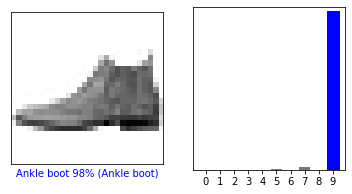

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

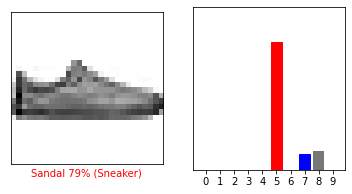

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

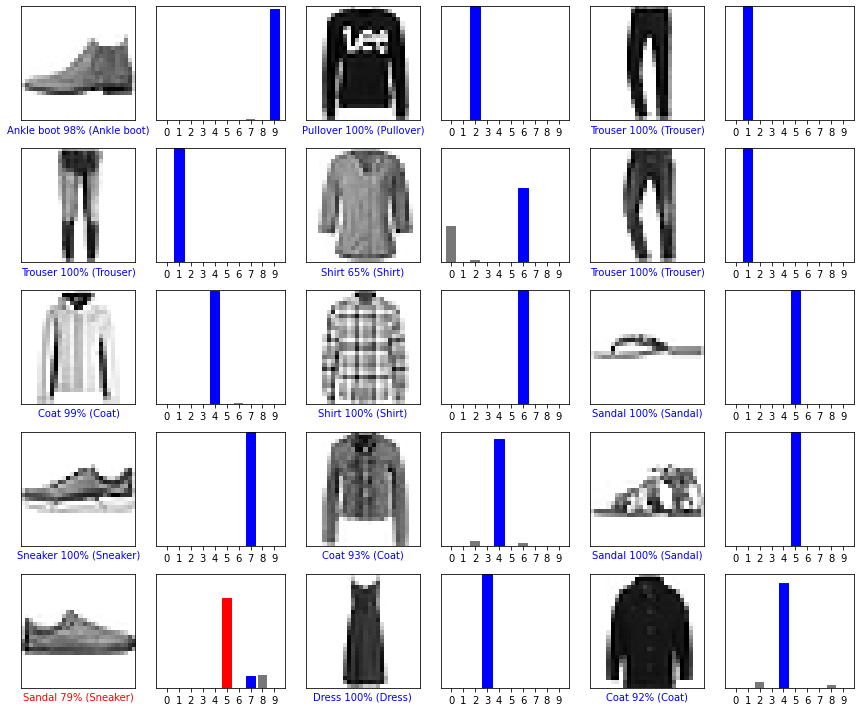

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.2901622e-05 1.1112720e-14 9.9954790e-01 3.9485815e-10 2.0636957e-04
  7.8756333e-12 1.9278938e-04 2.9756516e-16 2.2718803e-08 4.3763088e-15]]


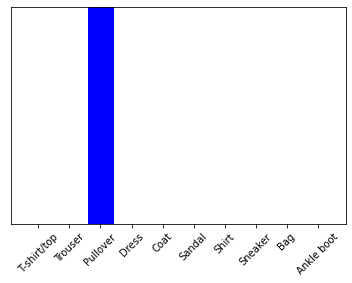

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.